# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [540]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Traffic Data.csv        


In [541]:
import pandas as pd
df = pd.read_csv('Traffic Data.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [543]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [544]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [545]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [546]:
df['weather_main'].unique()

array(['Mist', 'Clear', 'Clouds', 'Rain', 'Thunderstorm', 'Fog',
       'Drizzle', 'Snow', 'Haze', 'Smoke'], dtype=object)

In [547]:
df['weather_description'].unique()

array(['mist', 'sky is clear', 'broken clouds', 'moderate rain',
       'proximity shower rain', 'proximity thunderstorm', 'fog',
       'light rain', 'overcast clouds', 'light intensity drizzle',
       'scattered clouds', 'proximity thunderstorm with rain',
       'light snow', 'haze', 'few clouds', 'heavy intensity rain', 'snow',
       'drizzle', 'heavy intensity drizzle', 'thunderstorm',
       'Sky is Clear', 'heavy snow', 'thunderstorm with heavy rain',
       'light shower snow', 'shower drizzle',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'thunderstorm with light drizzle',
       'proximity thunderstorm with drizzle', 'smoke',
       'light intensity shower rain', 'sleet', 'light rain and snow',
       'freezing rain'], dtype=object)

In [548]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])
df['weather_description'] = le.fit_transform(df['weather_description'])

In [549]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,5,16,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,0,25,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,1,1,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,0,25,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,0,25,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,1,23,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,1,23,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,0,25,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,1,1,2018-02-12 15:00:00


In [550]:
df.shape

(20000, 8)

In [551]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [552]:
df.dropna(inplace=True)

In [553]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [554]:
df.shape

(19980, 8)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [555]:
df = df.sort_values(by='date_time')
df = df.set_index('date_time')

In [556]:
df = df.resample('W').mean()

In [557]:
df.shape

(98, 7)

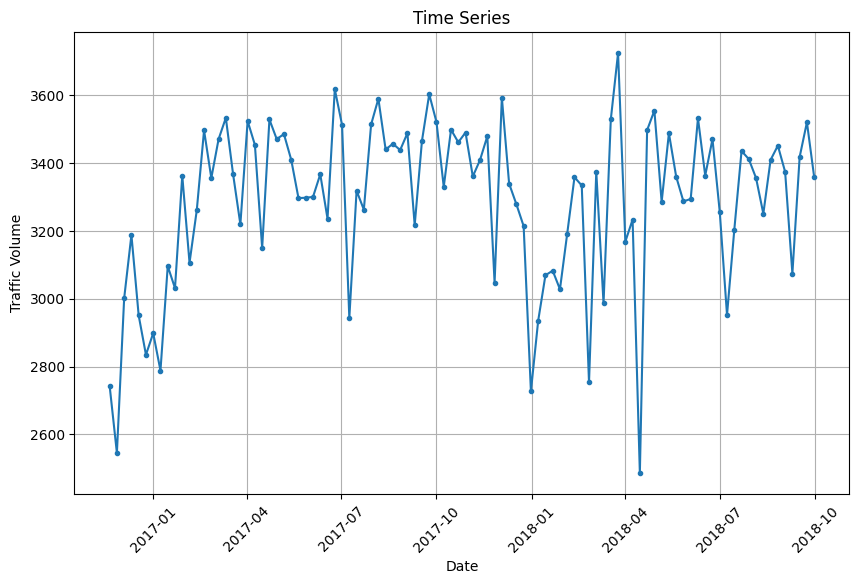

In [558]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['traffic_volume'], marker='.')
plt.xticks(rotation=45)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

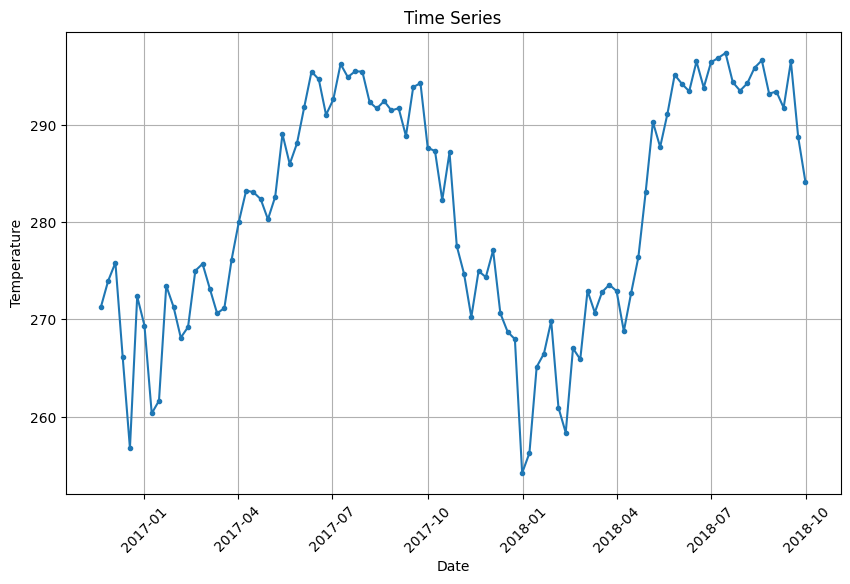

In [559]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['temp'], marker='.')
plt.xticks(rotation=45)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

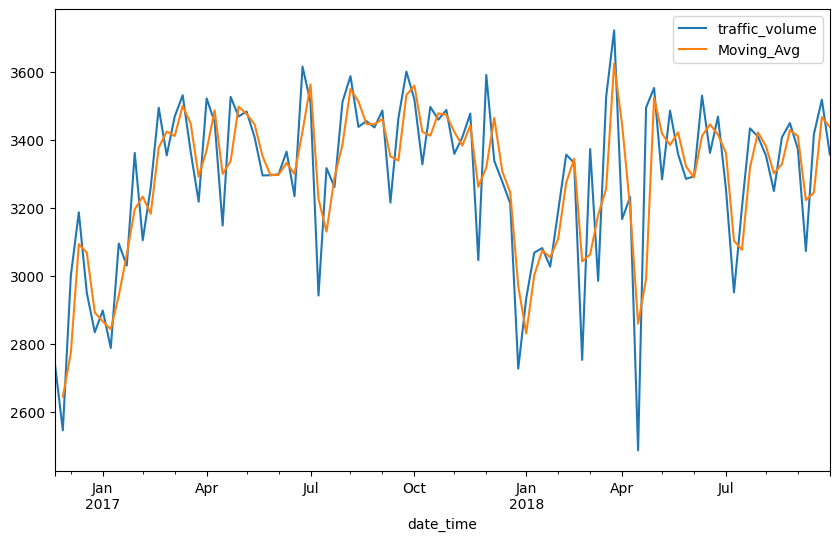

In [560]:
df['Moving_Avg'] = df['traffic_volume'].rolling(window=2).mean()
df[['traffic_volume', 'Moving_Avg']].plot(figsize=(10, 6))
plt.show()

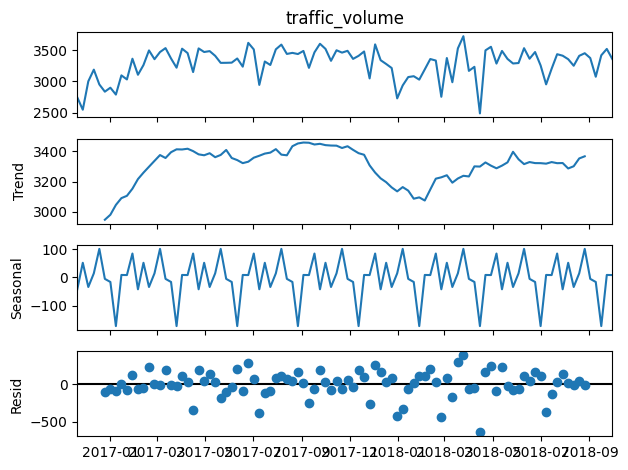

In [561]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompse = seasonal_decompose(df['traffic_volume'],
model='additive', period=11)
decompse.plot()
plt.show()

<Axes: xlabel='traffic_volume'>

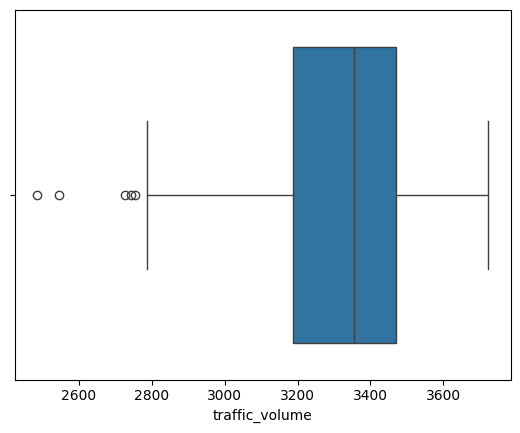

In [562]:
import seaborn as sns
sns.boxplot(x=df['traffic_volume'])

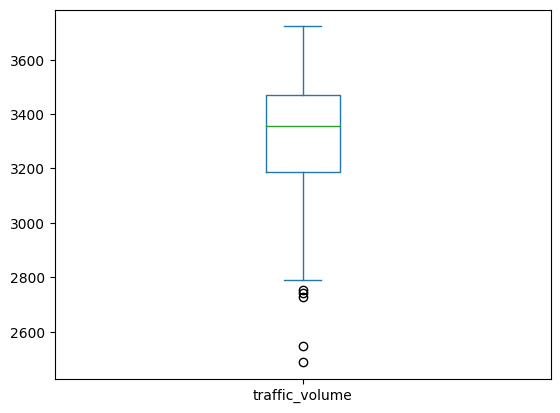

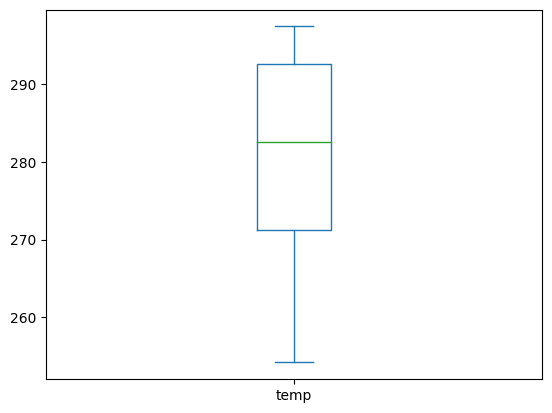

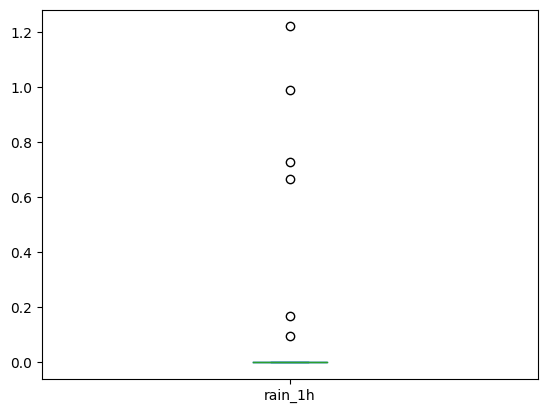

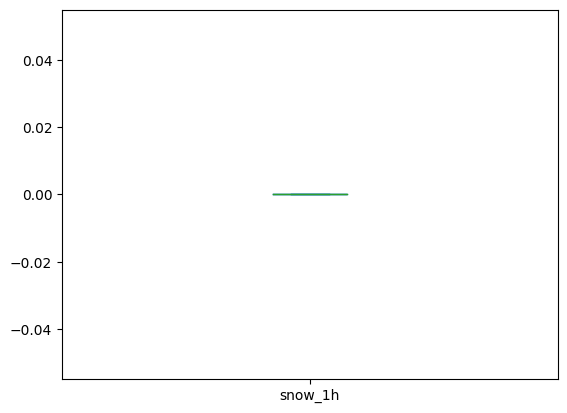

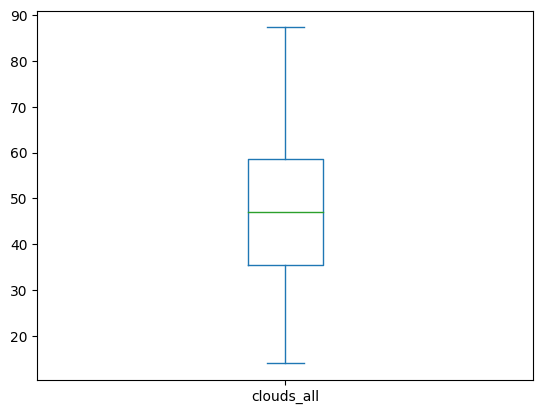

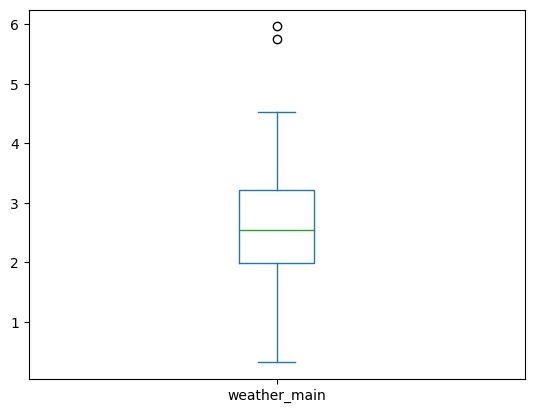

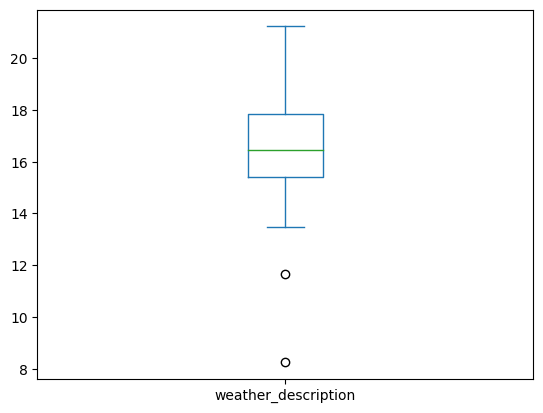

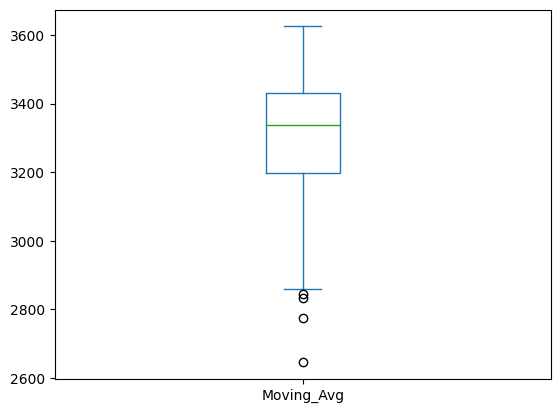

In [563]:
for i in df.columns:
    df[i].plot(kind='box')
    plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [564]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,prev_traffic_volume
date_time,,,,,,,,,
2016-11-20,2743.294118,271.270147,0.000000,0.0,56.823529,2.911765,15.470588,NaN,NaN
2016-11-27,2545.708904,273.955205,0.000000,0.0,68.157534,4.445205,15.308219,2644.501511,2743.294118
2016-12-04,3000.749064,275.831610,0.000000,0.0,87.348315,4.044944,14.183521,2773.228984,2545.708904
2016-12-11,3187.463303,266.166422,0.000000,0.0,73.206422,5.963303,14.931193,3094.106183,3000.749064
2016-12-18,2950.348624,256.773743,0.000000,0.0,44.958716,3.752294,17.660550,3068.905963,3187.463303
...,...,...,...,...,...,...,...,...,...
2018-09-02,3373.411765,293.413710,0.726742,0.0,53.162896,5.746606,13.714932,3411.864886,3450.318008
2018-09-09,3073.719665,291.749833,0.665858,0.0,46.175732,3.372385,15.397490,3223.565715,3373.411765
2018-09-16,3417.029240,296.505556,0.094912,0.0,22.883041,1.122807,19.415205,3245.374453,3073.719665


In [565]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,prev_traffic_volume
date_time,,,,,,,,,
2016-11-20,2743.294118,271.270147,0.000000,0.0,56.823529,2.911765,15.470588,NaN,NaN
2016-11-27,2545.708904,273.955205,0.000000,0.0,68.157534,4.445205,15.308219,2644.501511,2743.294118
2016-12-04,3000.749064,275.831610,0.000000,0.0,87.348315,4.044944,14.183521,2773.228984,2545.708904
2016-12-11,3187.463303,266.166422,0.000000,0.0,73.206422,5.963303,14.931193,3094.106183,3000.749064
2016-12-18,2950.348624,256.773743,0.000000,0.0,44.958716,3.752294,17.660550,3068.905963,3187.463303
...,...,...,...,...,...,...,...,...,...
2018-09-02,3373.411765,293.413710,0.726742,0.0,53.162896,5.746606,13.714932,3411.864886,3450.318008
2018-09-09,3073.719665,291.749833,0.665858,0.0,46.175732,3.372385,15.397490,3223.565715,3373.411765
2018-09-16,3417.029240,296.505556,0.094912,0.0,22.883041,1.122807,19.415205,3245.374453,3073.719665


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [566]:
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

In [567]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [568]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [528]:
!pip install pmdarima

In [529]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Moving_Avg,prev_traffic_volume
date_time,,,,,,,,,
2016-11-30,2704.857143,274.637456,0.000000,0.0,72.440313,4.264188,14.573386,NaN,NaN
2016-12-31,2995.324411,266.953529,0.000000,0.0,62.256959,3.994647,16.655246,2850.090777,2704.857143
2017-01-31,3018.398049,267.969861,0.000000,0.0,59.520000,3.435122,15.376585,3006.861230,2995.324411
2017-02-28,3386.042017,272.000710,0.000000,0.0,36.428571,1.600840,15.222689,3202.220033,3018.398049
2017-03-31,3414.931792,273.882821,0.000000,0.0,52.494798,2.145665,17.661272,3400.486904,3386.042017
2017-04-30,3366.454262,282.207017,0.000000,0.0,59.879418,2.694387,16.281705,3390.693027,3414.931792
2017-05-31,3353.585084,286.285599,0.000000,0.0,53.825630,2.614496,16.727941,3360.019673,3366.454262
2017-06-30,3470.573006,293.611872,0.000000,0.0,38.874847,2.187730,17.750920,3412.079045,3353.585084
2017-07-31,3237.886926,295.470495,0.000000,0.0,33.901060,2.292108,16.996466,3354.229966,3470.573006


In [530]:
from pmdarima import auto_arima
sw_fit = auto_arima(df['traffic_volume'],  suppress_warnings=True)

sw_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -150.517
Date:                Sun, 25 Aug 2024   AIC                            307.033
Time:                        18:00:29   BIC                            310.440
Sample:                    11-30-2016   HQIC                           307.890
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1979.6708    890.843      2.222      0.026     233.650    3725.692
ar.L1          0.3924      0.278      1.411      0.158      -0.153       0.938
sigma2       2.81e+04   9069.514      3.098      0.002    1.03e+04    4.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.40
Prob(Q):                              0.86   Prob(JB):                         0.02
Heteroskedasticity (H):               0.34   Skew:                            -1.10
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [531]:
y_pred = stepwise_fit.predict(n_periods=len(X_test))

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: xlabel='date_time'>

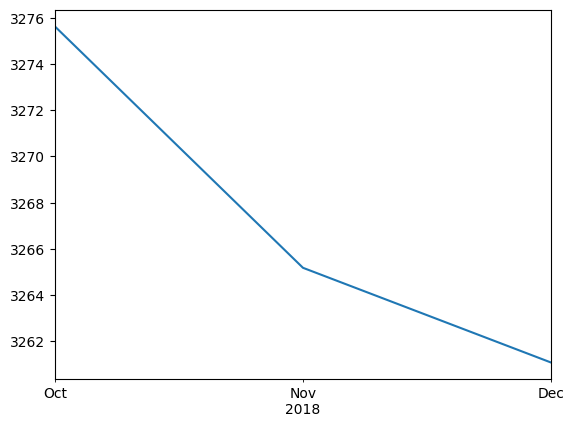

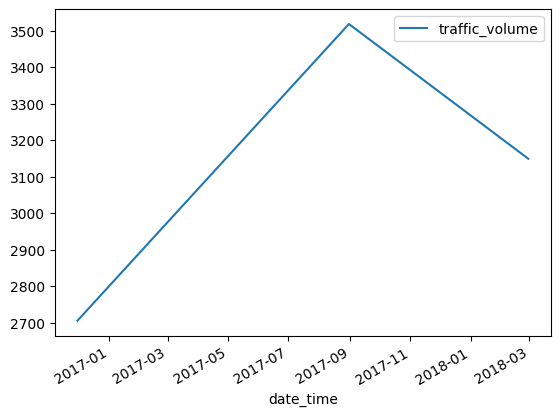

In [532]:
y_pred.plot()
pd.DataFrame(y_test).plot()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [533]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Dropout,Input

from keras.callbacks import EarlyStopping

In [534]:
M_RRN = Sequential([
    Input(shape=(X_train.shape[1],1)),
    SimpleRNN(units=25, return_sequences=True),
    Dropout(0.25),

    SimpleRNN(units=25),
    Dropout(0.25),


    Dense(units=1)
])

In [535]:
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 8, 128)              │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 8, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 128)                 │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 493,829 (1.88 MB)

 Trainable params: 164,609 (643.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 329,220 (1.26 MB)

In [536]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [537]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

model_rnn.fit(X_train,y_train,epochs=200,validation_split=0.5,callbacks=early_stopping)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 222006.0312 - mean_squared_error: 222006.0312 - val_loss: 300832.1250 - val_mean_squared_error: 300832.1250
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 275983.5938 - mean_squared_error: 275983.5938 - val_loss: 1006243.3750 - val_mean_squared_error: 1006243.3750
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1110871.7500 - mean_squared_error: 1110871.7500 - val_loss: 25553.9023 - val_mean_squared_error: 25553.9023
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 89611.9609 - mean_squared_error: 89611.9609 - val_loss: 426376.1562 - val_mean_squared_error: 426376.1562
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 333738.3125 - mean_squared_error: 333738.3125 - val_loss: 662064.8125 - val_mean_squared_error: 662064.8125
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 435255.9062 - mean_squared_error: 435255.9062 - val_loss: 467568.9375 - val_mean_squared_error: 467568.9375

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [538]:
y_pred = model_rnn.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: xlabel='date_time'>

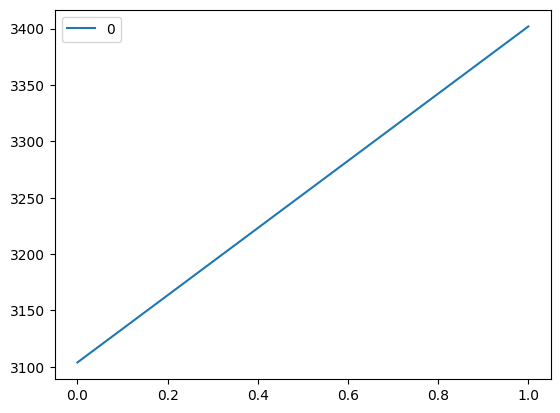

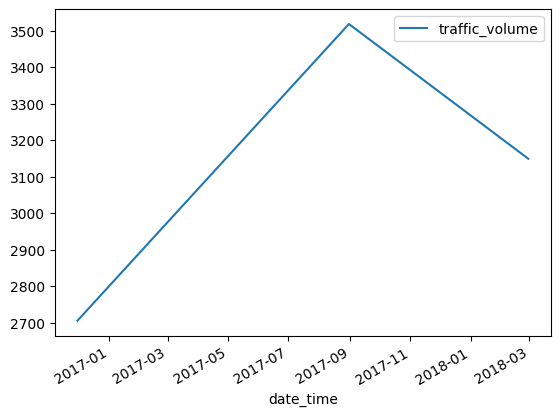

In [539]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?



2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1-I used normalization and removed 20 missing values to clean the data these steps helped prepare the data for better model training.

2- I created a new feature 'prev_traffic_volume' by shifting the 'traffic_volume' column by one time step this helped the forecasting model by providing it with information on the previous traffic volume.

 3-I used RNN model with two SimpleRNN layers each with 25 units and included Dropout layers to prevent overfitting the model starts with an input layer matching the training data shape and ends with a Dense layer for the output

3-I used an ARIMA model with **auto_arima** to forecast traffic volume this model is ideal for time series data as it captures trends and seasonalit making it effective for accurate predictions.

4-I used a 200 epochs and the Adam optimizer and 'Early stopping' was applied to prevent overfitting

The model's current performance is not satisfactory and i consider it not reliable at this stage and i will work on improving it in the future to achieve better results, as I am not satisfied with its current state.








